# Allen Ben Philipose (18BIS0043)
# CSE4022 - Comparison of Magazine Articles

## Scraping

In [123]:
import nltk
from urllib import request 
global url
global confidence
url = []
confidence = []


url1 = "http://www.natgeotraveller.in/six-years-and-counting/"
html1 = request.urlopen(url1).read().decode('utf8')
#print(html1)
url.append(url1)
confidence.append(0.0)

In [124]:
url2 = "http://www.natgeotraveller.in/train-to-nowhere/"
html2 = request.urlopen(url2).read().decode('utf8')
#print(html2)
url.append(url2)
confidence.append(0.0)

In [125]:
url3 = "http://www.natgeotraveller.in/what-dreams-may-come/"
html3 = request.urlopen(url3).read().decode('utf8')
#print(html3)
url.append(url3)
confidence.append(0.0)

In [126]:
url4 = "http://www.natgeotraveller.in/getting-saucy-about-food/"
html4 = request.urlopen(url4).read().decode('utf8')
#print(html4)
url.append(url4)
confidence.append(0.0)

## Tokenization 

In [127]:
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
raw1 = BeautifulSoup(html1, 'html.parser').get_text()
tokens1 = word_tokenize(raw1)
print(len(tokens1))
#print(tokens1)

977


In [128]:
raw2 = BeautifulSoup(html2, 'html.parser').get_text()
tokens2 = word_tokenize(raw2)
print(len(tokens2))
#print(tokens2)

986


In [129]:
raw3 = BeautifulSoup(html3, 'html.parser').get_text()
tokens3 = word_tokenize(raw3)
print(len(tokens3))
#print(tokens3)

923


In [130]:
raw4 = BeautifulSoup(html4, 'html.parser').get_text()
tokens4 = word_tokenize(raw4)
print(len(tokens4))
#print(tokens4)

1007


## Remove Stopwords 

In [131]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
filtered_words1=[]
for w in tokens1:
    if w not in stop_words:
        filtered_words1.append(w)
#print(filtered_words1)

In [132]:
stop_words=set(stopwords.words("english"))
filtered_words2=[]
for w in tokens2:
    if w not in stop_words:
        filtered_words2.append(w)
#print(filtered_words2)

In [133]:
stop_words=set(stopwords.words("english"))
filtered_words3=[]
for w in tokens3:
    if w not in stop_words:
        filtered_words3.append(w)
#print(filtered_words3)

In [134]:
stop_words=set(stopwords.words("english"))
filtered_words4=[]
for w in tokens4:
    if w not in stop_words:
        filtered_words4.append(w)
#print(filtered_words4)

## Parameter - 1

### In articles, thoughts have to be conveyed with a specific number of words - neither too low for incomplete information delivery nor too high for the user to lose interest

In [135]:
fw = [filtered_words1, filtered_words2, filtered_words3, filtered_words4]
global confidence
i=0
for i in range(0,4):
    if len(fw[i])>=700 and len(fw[i])<750: confidence[i] += 0.2; # 20% confidence
    elif len(fw[i]) in range(600,700) or len(fw[i]) in range(750,800):
        confidence[i] += 0.1;
    print("Total Number of words: ", len(fw[i]))
    print("Confidence: ", round(confidence[i],2))

Total Number of words:  716
Confidence:  0.2
Total Number of words:  733
Confidence:  0.2
Total Number of words:  686
Confidence:  0.1
Total Number of words:  755
Confidence:  0.1


## Parameter - 2 

### Repeating certain words are considered to be bad from an editorial point of view as it signifies the poor vocabulary of the writer

In [136]:
global confidence
for x in range(0,4):
    repeated = [] 
    for i in range(0, len(fw[x])): 
        k = i + 1
        for j in range(k,len(fw[x])): 
            if fw[x][i] == fw[x][j] and fw[x][i] not in repeated: 
                repeated.append(fw[x][i]) 
    print("Number of repeated words: ",len(repeated))
    if len(repeated)<100: confidence[x]+=0.3
    elif len(repeated)<105: confidence[x]+=0.2
    elif len(repeated)<110: confidence[x]+=0.1
    print("Confidence: ",round(confidence[x],2))

Number of repeated words:  109
Confidence:  0.3
Number of repeated words:  110
Confidence:  0.2
Number of repeated words:  106
Confidence:  0.2
Number of repeated words:  117
Confidence:  0.1


### Finding the frequency distribution of words in a certain word length so as to know how many times same word does the author repeat and how many unique words does the author repeat at every instance of 50 words or certain length words - A Diagramatic Representation 

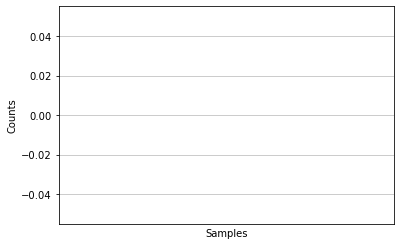

In [137]:
fd = nltk.FreqDist(tokens1[1900:1950])
fd.plot()

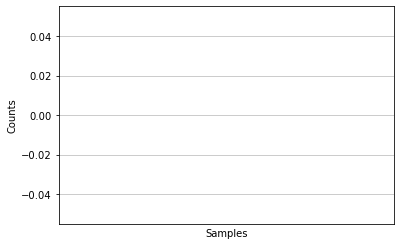

In [138]:
fd = nltk.FreqDist(tokens2[1900:1950])
fd.plot()

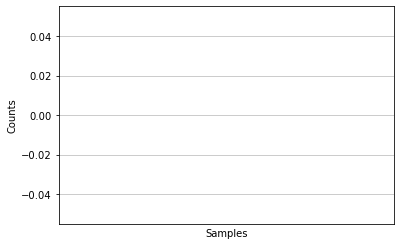

In [139]:
fd = nltk.FreqDist(tokens3[1900:1950])
fd.plot()

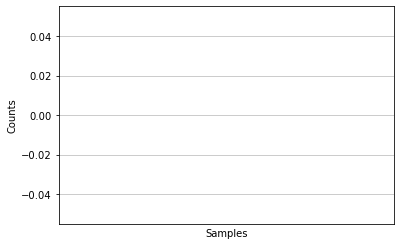

In [140]:
fd = nltk.FreqDist(tokens4[1900:1950])
fd.plot()

## Parameter 3

### Travel logs are essentially to provide a positive sentiment for the readers


In [141]:
# Sentiment Analysis 

## Parameter 4 

### An article can be considered bloated if the number of adjectives are high

In [142]:
from nltk.corpus import wordnet as wn
global confidence
for x in range(0,4):
    adj = [] 
    for i in range(0, len(fw[x])): 
        tmp = wn.synsets(fw[x][i])
        for temp in tmp:
            c = temp.name().split('.')
            #print(c)
            if c[1] == 'a' and fw[x][i] not in adj: 
                adj.append(fw[x][i]) 
    print("Number of Adjectives: ",len(adj))
    diff = len(fw[x])-len(adj)
    print("Difference: ",diff)
    if diff<600: confidence[x]+=0.1
    elif diff<650: confidence[x]+=0.2
    elif diff<700: confidence[x]+=0.3
    print("Confidence: ",round(confidence[x],2))
    print()

Number of Adjectives:  45
Difference:  671
Confidence:  0.6

Number of Adjectives:  62
Difference:  671
Confidence:  0.5

Number of Adjectives:  56
Difference:  630
Confidence:  0.4

Number of Adjectives:  58
Difference:  697
Confidence:  0.4



## Parameter 5 

### Number of polysyllables should be within a range where it shouldn't sound complex nor too simple. Here, 4 syllables are set as the parameter

In [143]:
# https://stackoverflow.com/questions/405161/detecting-syllables-in-a-word

a4 = [0,0,0,0]
global confidence
for x in range(0,4):
    for i in range(0, len(fw[x])): 
        theText = fw[x][i]
        cleanText = ""
        for ch in theText:
            if ch in "abcdefghijklmnopqrstuvwxyz'’":
                cleanText += ch
            else:
                cleanText += " "

        asVow    = "aeiouy'’"
        dExep    = ("ei","ie","ua","ia","eo")
        theWords = cleanText.lower().split()
        allSylls = 0
        for inWord in theWords:
            nChar  = len(inWord)
            nSyll  = 0
            wasVow = False
            wasY   = False
            if nChar == 0:
                continue
            if inWord[0] in asVow:
                nSyll += 1
                wasVow = True
                wasY   = inWord[0] == "y"
            for c in range(1,nChar):
                isVow  = False
                if inWord[c] in asVow:
                    nSyll += 1
                    isVow = True
                if isVow and wasVow:
                    nSyll -= 1
                if isVow and wasY:
                    nSyll -= 1
                if inWord[c:c+2] in dExep:
                    nSyll += 1
                wasVow = isVow
                wasY   = inWord[c] == "y"
            if inWord.endswith(("e")):
                nSyll -= 1
            if inWord.endswith(("le","ea","io")):
                nSyll += 1
            if nSyll < 1:
                nSyll = 1
            # print("%-15s: %d" % (inWord,nSyll))
            if(nSyll>3): a4[x]+=1
    print(a4[x])

37
29
45
41


In [144]:
global confidence
for x1 in range(0,4):
    print(a4[x1])
    if a4[x1] in range(25,35): confidence[x1]+=0.3
    elif a4[x1] in range(15,25): confidence[x1]+=0.2
    elif a4[x1] in range(35,45): confidence[x1]+=0.2
    print("Confidence: ",round(confidence[x1],2))

37
Confidence:  0.8
29
Confidence:  0.8
45
Confidence:  0.4
41
Confidence:  0.6


## Parameter 6

### Number of words should be within a range where it shouldn't sound complex nor too simple

## Parameter 7

### Readability index - Check up on this

In [97]:
# Idea from: https://medium.com/glose-team/how-to-evaluate-text-readability-with-nlp-9c04bd3f46a2
# https://www.geeksforgeeks.org/readability-index-pythonnlp/

## Run this for resetting the confidence scores 

In [117]:
global confidence
for i in range(len(confidence)):
    confidence[i]=0
print(confidence)

[0, 0, 0, 0]


## Calculating confidences

### All the scores which are cumulated till now are checked against a minimum threshold score

In [147]:
global confidence
for i in range(0,4):
    if confidence[i]>=0.8:
        print("Author of article", i+1, "is hired")
        print("Article ",i+1,":",url[i])

Author of article 1 is hired
Article  1 : http://www.natgeotraveller.in/six-years-and-counting/
Author of article 2 is hired
Article  2 : http://www.natgeotraveller.in/train-to-nowhere/
